In [0]:
from time import time
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from keras import regularizers
import tensorflow as tf

Using TensorFlow backend.


In [0]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [0]:
y_train = to_categorical(num_classes=10,y=y_train)
y_test = to_categorical(num_classes=10,y=y_test)
print('y_train_full shape: {}, y_test shape: {}'
      .format(y_train.shape, y_test.shape))

y_train_full shape: (50000, 10), y_test shape: (10000, 10)


In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [0]:
weight_decay = 1e-4

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:],kernel_regularizer=regularizers.l2(weight_decay), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu',kernel_regularizer=regularizers.l2(weight_decay),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu',kernel_regularizer=regularizers.l2(weight_decay),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu',kernel_regularizer=regularizers.l2(weight_decay),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu',kernel_regularizer=regularizers.l2(weight_decay),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
batch_size=128
epochs = 125
start = time()

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

end = time()

Epoch 1/125
391/391 [==============================] - 6s 16ms/step - loss: 1.9202 - accuracy: 0.3399 - val_loss: 2.5018 - val_accuracy: 0.2325
Epoch 2/125
391/391 [==============================] - 6s 14ms/step - loss: 1.4085 - accuracy: 0.5269 - val_loss: 1.4018 - val_accuracy: 0.5515
Epoch 3/125
391/391 [==============================] - 6s 14ms/step - loss: 1.1799 - accuracy: 0.6213 - val_loss: 1.0913 - val_accuracy: 0.6617
Epoch 4/125
391/391 [==============================] - 6s 14ms/step - loss: 1.0414 - accuracy: 0.6813 - val_loss: 1.2198 - val_accuracy: 0.6310
Epoch 5/125
391/391 [==============================] - 6s 14ms/step - loss: 0.9493 - accuracy: 0.7172 - val_loss: 0.8457 - val_accuracy: 0.7458
Epoch 6/125
391/391 [==============================] - 6s 14ms/step - loss: 0.8786 - accuracy: 0.7439 - val_loss: 0.8161 - val_accuracy: 0.7668
Epoch 7/125
391/391 [==============================] - 6s 14ms/step - loss: 0.8359 - accuracy: 0.7638 - val_loss: 0.7898 - val_accuracy:

In [0]:
print('Total training time {} seconds'.format(end - start))

Total training time 697.6907918453217 seconds


In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.7304146885871887
Test accuracy: 0.8816999793052673


In [0]:
dic = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def getlabel(i):
  return dic[i]

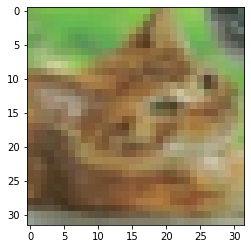

Prediction is  cat
Answer is  cat


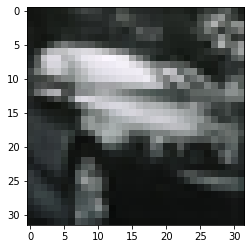

Prediction is  automobile
Answer is  automobile


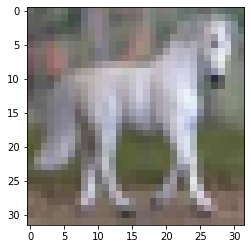

Prediction is  dog
Answer is  horse


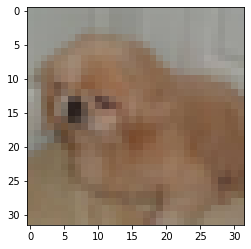

Prediction is  dog
Answer is  dog


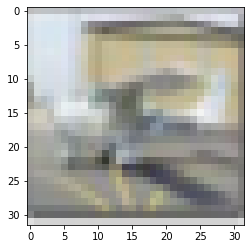

Prediction is  airplane
Answer is  airplane


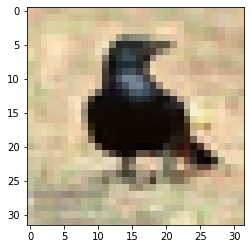

Prediction is  bird
Answer is  bird


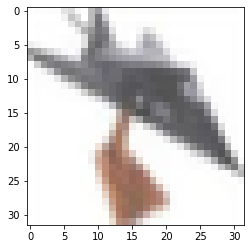

Prediction is  airplane
Answer is  airplane


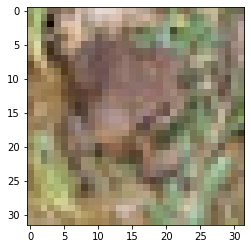

Prediction is  frog
Answer is  frog


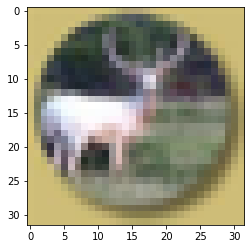

Prediction is  automobile
Answer is  deer


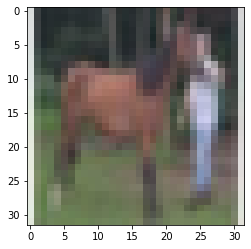

Prediction is  horse
Answer is  horse


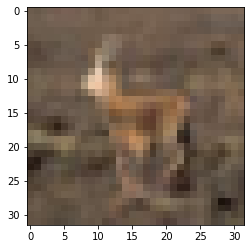

Prediction is  deer
Answer is  deer


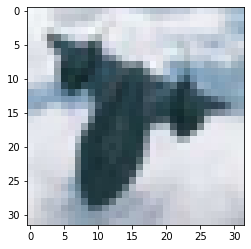

Prediction is  airplane
Answer is  airplane


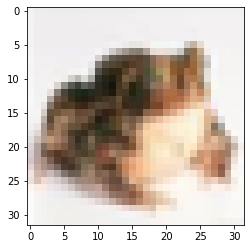

Prediction is  frog
Answer is  frog


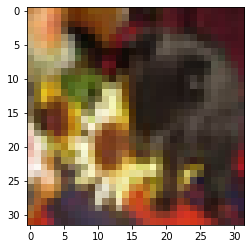

Prediction is  cat
Answer is  dog


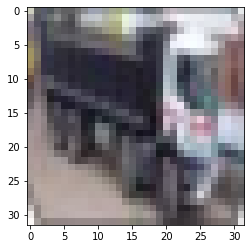

Prediction is  truck
Answer is  truck


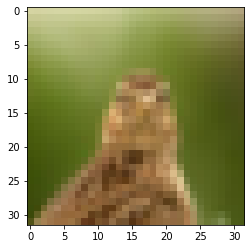

Prediction is  bird
Answer is  bird


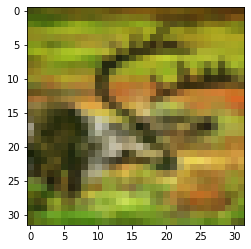

Prediction is  deer
Answer is  deer


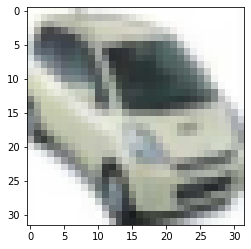

Prediction is  automobile
Answer is  automobile


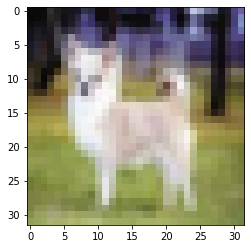

Prediction is  dog
Answer is  dog


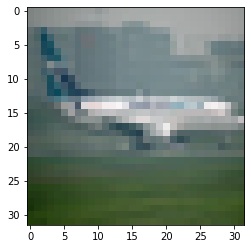

Prediction is  airplane
Answer is  airplane


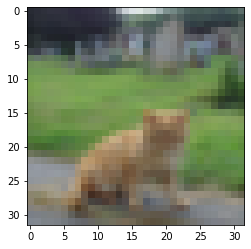

Prediction is  deer
Answer is  cat


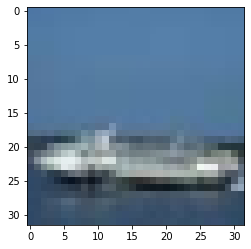

Prediction is  ship
Answer is  ship


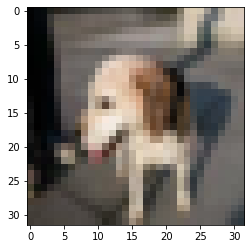

Prediction is  dog
Answer is  dog


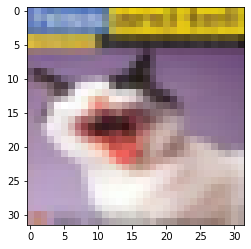

Prediction is  cat
Answer is  cat


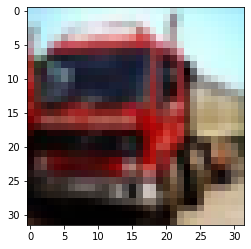

Prediction is  truck
Answer is  truck


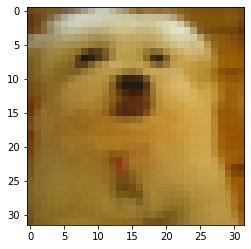

Prediction is  dog
Answer is  dog


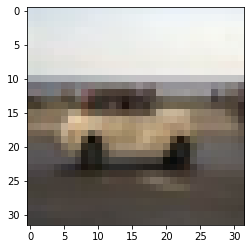

Prediction is  automobile
Answer is  automobile


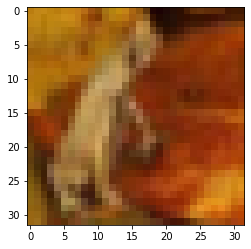

Prediction is  cat
Answer is  frog


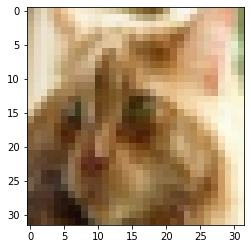

Prediction is  cat
Answer is  cat


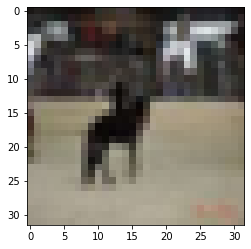

Prediction is  horse
Answer is  horse


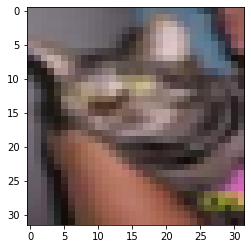

Prediction is  cat
Answer is  cat


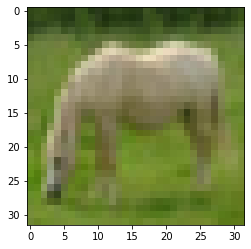

Prediction is  horse
Answer is  horse


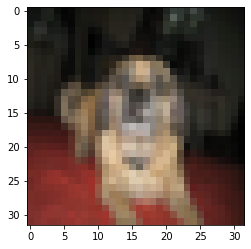

Prediction is  dog
Answer is  dog


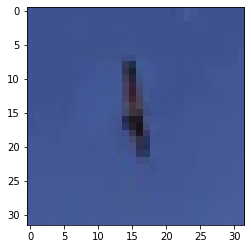

Prediction is  bird
Answer is  bird


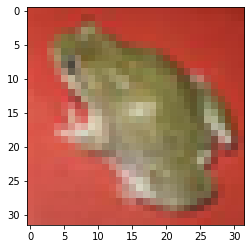

Prediction is  frog
Answer is  frog


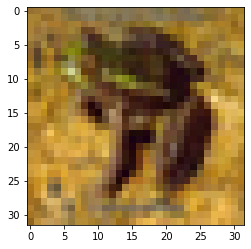

Prediction is  frog
Answer is  frog


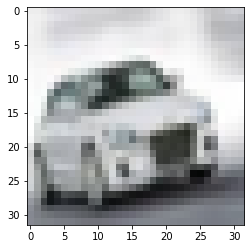

Prediction is  automobile
Answer is  automobile


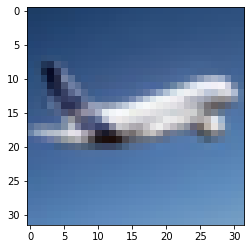

Prediction is  airplane
Answer is  airplane


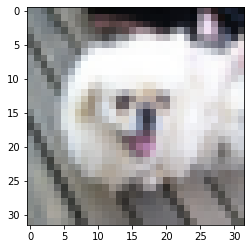

Prediction is  dog
Answer is  dog


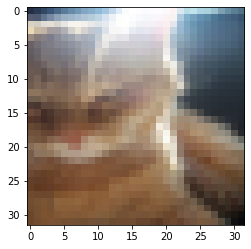

Prediction is  deer
Answer is  cat


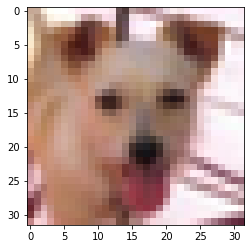

Prediction is  dog
Answer is  dog


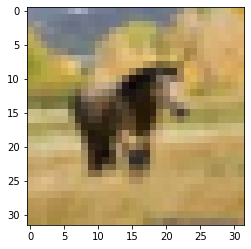

Prediction is  horse
Answer is  horse


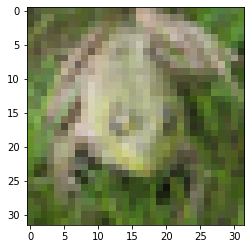

Prediction is  frog
Answer is  frog


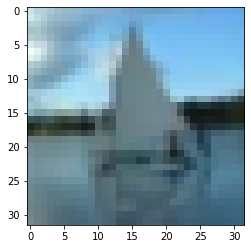

Prediction is  ship
Answer is  ship


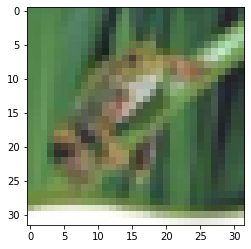

Prediction is  frog
Answer is  frog


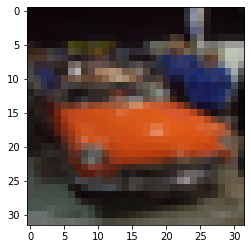

Prediction is  automobile
Answer is  automobile


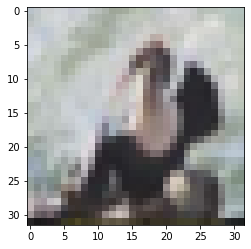

Prediction is  bird
Answer is  bird


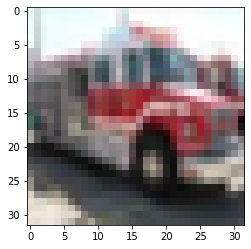

Prediction is  truck
Answer is  truck


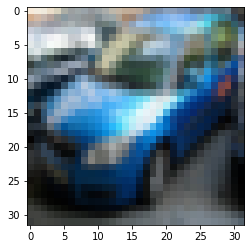

Prediction is  automobile
Answer is  automobile


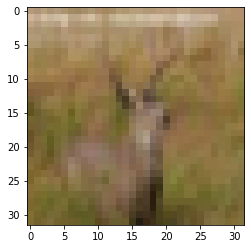

Prediction is  deer
Answer is  deer


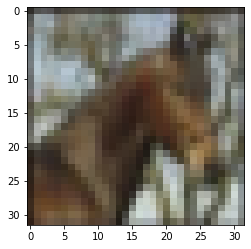

Prediction is  horse
Answer is  horse


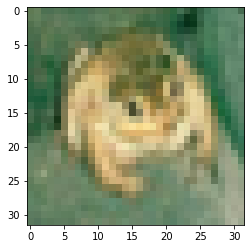

Prediction is  frog
Answer is  frog


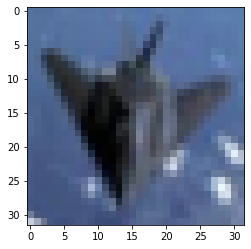

Prediction is  airplane
Answer is  airplane


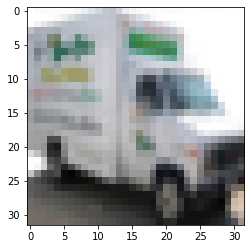

Prediction is  truck
Answer is  truck


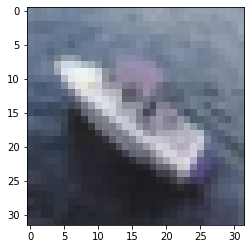

Prediction is  ship
Answer is  ship


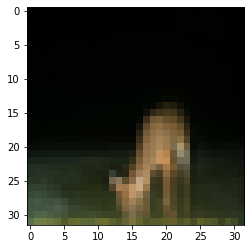

Prediction is  deer
Answer is  deer


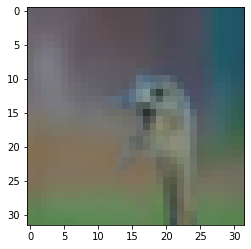

Prediction is  bird
Answer is  bird


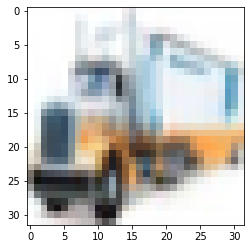

Prediction is  truck
Answer is  truck


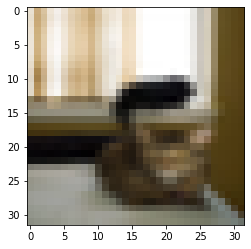

Prediction is  cat
Answer is  cat


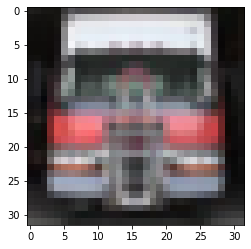

Prediction is  truck
Answer is  truck


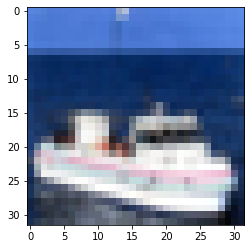

Prediction is  ship
Answer is  ship


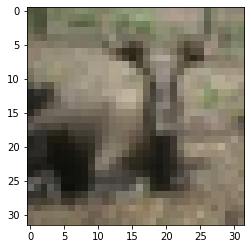

Prediction is  deer
Answer is  deer


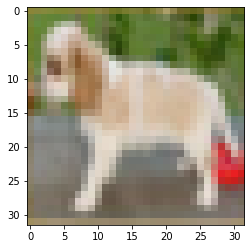

Prediction is  dog
Answer is  dog


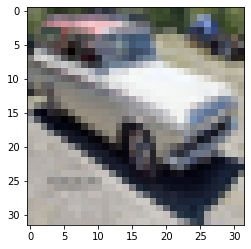

Prediction is  automobile
Answer is  automobile


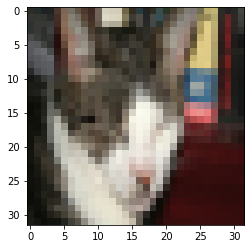

Prediction is  cat
Answer is  cat


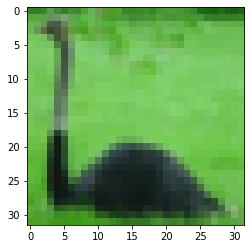

Prediction is  bird
Answer is  bird


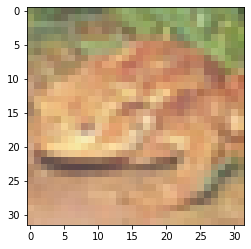

Prediction is  frog
Answer is  frog


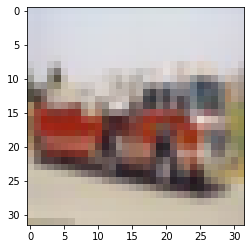

Prediction is  truck
Answer is  truck


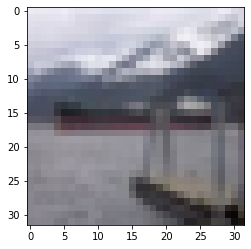

Prediction is  ship
Answer is  ship


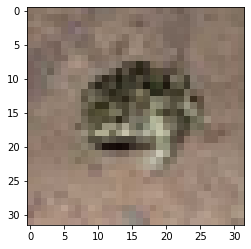

Prediction is  frog
Answer is  frog


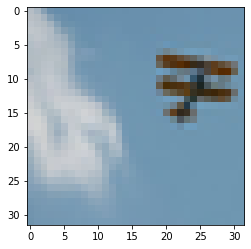

Prediction is  airplane
Answer is  airplane


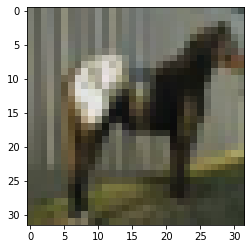

Prediction is  horse
Answer is  horse


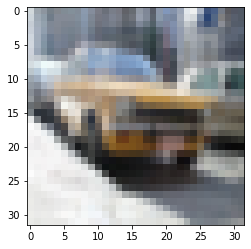

Prediction is  automobile
Answer is  automobile


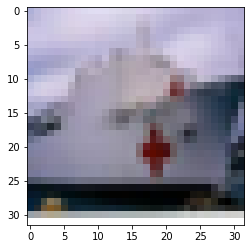

Prediction is  ship
Answer is  ship


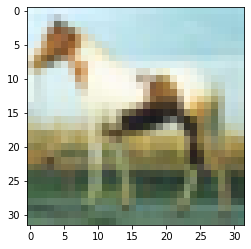

Prediction is  horse
Answer is  horse


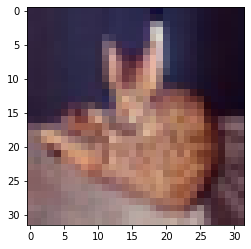

Prediction is  cat
Answer is  cat


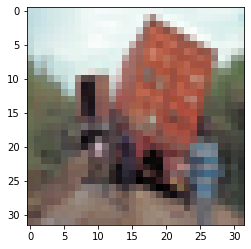

Prediction is  truck
Answer is  truck


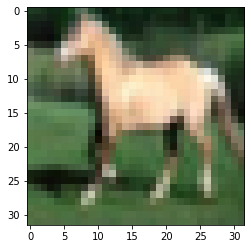

Prediction is  horse
Answer is  horse


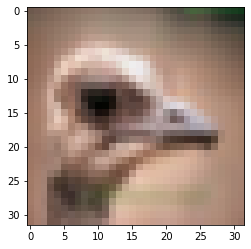

Prediction is  bird
Answer is  bird


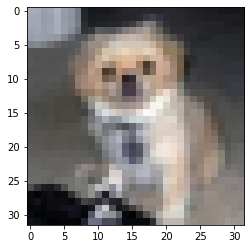

Prediction is  dog
Answer is  dog


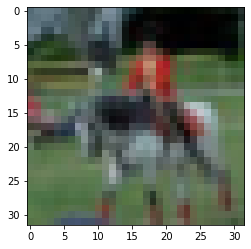

Prediction is  horse
Answer is  horse


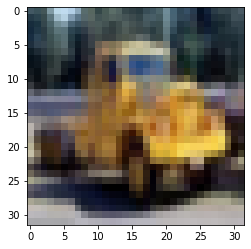

Prediction is  truck
Answer is  truck


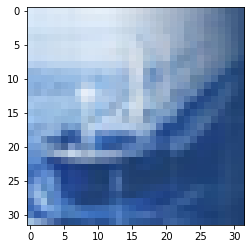

Prediction is  ship
Answer is  ship


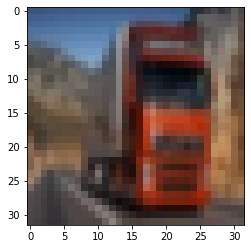

Prediction is  truck
Answer is  truck


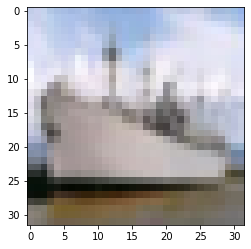

Prediction is  ship
Answer is  ship


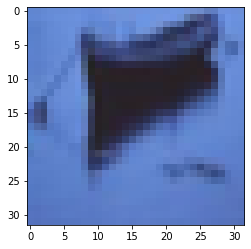

Prediction is  airplane
Answer is  ship


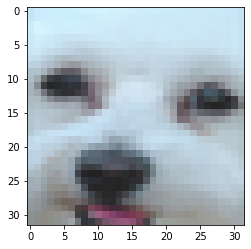

Prediction is  ship
Answer is  dog


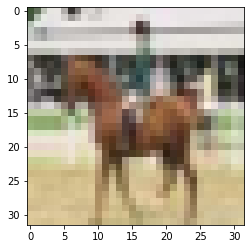

Prediction is  horse
Answer is  horse


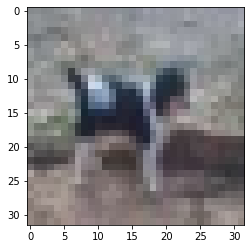

Prediction is  bird
Answer is  dog


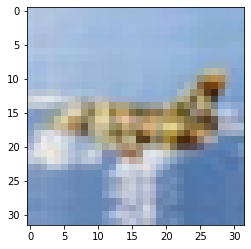

Prediction is  airplane
Answer is  airplane


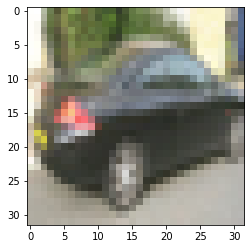

Prediction is  automobile
Answer is  automobile


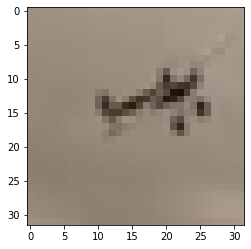

Prediction is  airplane
Answer is  airplane


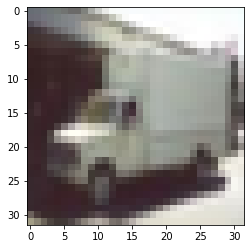

Prediction is  truck
Answer is  truck


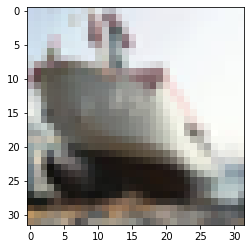

Prediction is  ship
Answer is  ship


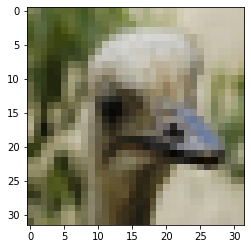

Prediction is  bird
Answer is  bird


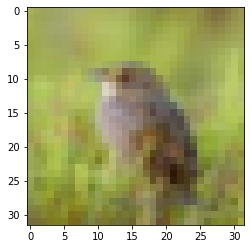

Prediction is  bird
Answer is  bird


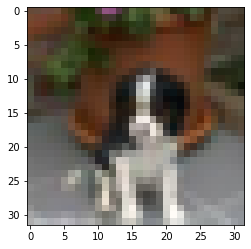

Prediction is  dog
Answer is  dog


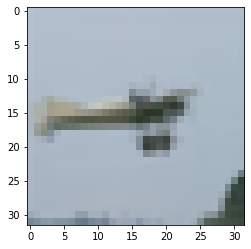

Prediction is  airplane
Answer is  airplane


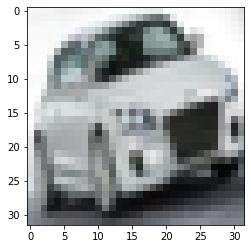

Prediction is  automobile
Answer is  automobile


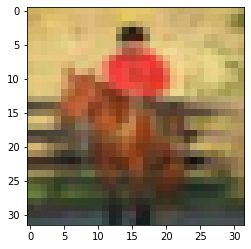

Prediction is  horse
Answer is  horse


In [0]:

from random import randint
from numpy import argmax
from matplotlib import pyplot
from matplotlib.image import imread
from PIL import Image
import cv2



pred = model.predict(x_test)

for i in range(0,100):
    j = randint(1,10000)
    pyplot.imshow(x_test[j])
    pyplot.show()
    print ("Prediction is ",getlabel(argmax(pred[j])))
    print ("Answer is ",getlabel(argmax(y_test[j])))